In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
from tqdm import tqdm

%matplotlib inline

# Definition of functions $p_{b, n}$, $q_{b, n}$ and $p_{c,b,n}$

Let $\xi_{b, n} \sim Bin(n, b / n)$ for integers $b, n$, such that $0 \leq b < n$. Define
$$p_{b, n} = {\sf P} (\xi_{b, n} < b),$$
$$q_{b, n} = \frac{1/2 - p_{b, n}}{{\sf P} (\xi_{b,n} = b)}.$$
Additionally, for $0 \leq c \leq 1$, we define $\xi_{c,b,n} \sim Bin(n, b / (n+c)$ and, respectively,
$$p_{c,b,n} = {\sf P} (\xi_{c,b,n} < b).$$

In [2]:
def p_bn(b, n, c=0):
    return sps.binom(n, b / (n+c)).cdf(b - 1)
def z_bn(b, n):
    return (1/2 - p_bn(b, n)) / sps.binom(n, b/n).pmf(b)

# Verifying Theorem 2 for small values of $b$ and $n$

In [3]:
def check_thm_fixed_n(n):
    for b in range(n - 1):
        if p_bn(b + 1, n) > p_bn(b, n) and n < 3 * b + 2:
            return False
        elif p_bn(b + 1, n) < p_bn(b, n) and n > 3 * b + 1:
            return False
        elif p_bn(b + 1, n) == p_bn(b, n):
            return False
    return True

def check_thm_upto_n(upto_n):
    for n in tqdm(range(upto_n)):
        if not check_thm_fixed_n(n):
            return False
    return True

In [4]:
# we will verify the theorem 2 for all values of n up to 200
upto_n = 200
result = check_thm_upto_n(upto_n)
if result:
    print(f"All values verified up to n = {upto_n}")
else:
    print("Verification failed!")

100%|██████████| 200/200 [02:31<00:00,  1.32it/s]

All values verified up to n = 200


# Plots of $p_{b,n}$, $q_{b,n}$ and $p_{c,b,n}$

In [5]:
SMALL_SIZE = 12
MEDIUM_SIZE = 25
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels

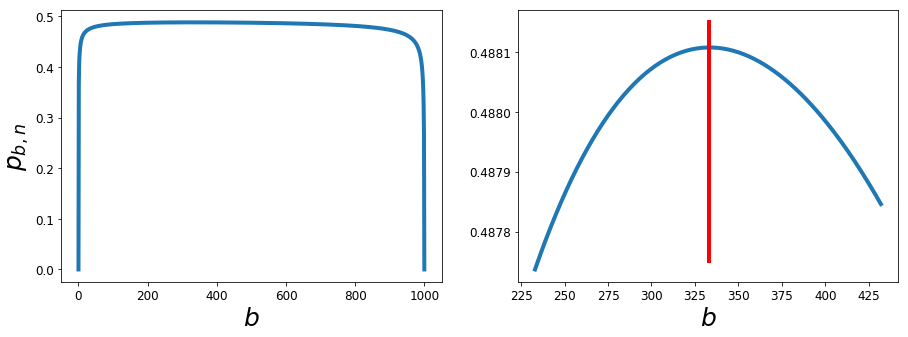

In [6]:
n = 1000
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.ylabel(r'$p_{b, n}$')
plt.xlabel(r'$b$')
plt.plot([p_bn(b, n) for b in range(n + 1)], linewidth=4)
plt.subplot(122)
plt.xlabel(r'$b$')
plt.plot(range(n // 3 - 100, n // 3 + 100), 
         [p_bn(b, n) for b in range(n // 3 - 100, n // 3 + 100)],
         linewidth=4)
plt.plot([(n - 1) // 3, (n - 1) // 3], [0.48775, 0.48815], c='r', linewidth=4)
plt.savefig('figures/p_bn.pdf')
plt.show()

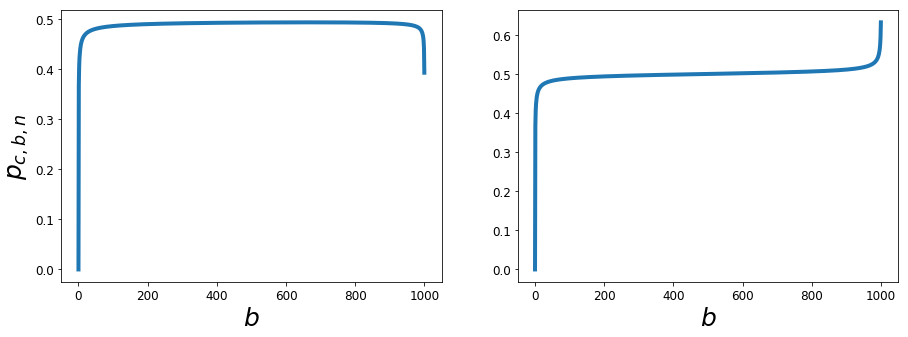

In [7]:
n = 1000
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.ylabel(r'$\tilde p_{c, b, n}$')
plt.xlabel(r'$b$')
plt.plot([p_bn(b, n, c=0.5) for b in range(n + 1)], linewidth=4)
plt.subplot(122)
plt.xlabel(r'$b$')
plt.plot([p_bn(b, n, c=1) for b in range(n + 1)], linewidth=4)
plt.savefig('figures/p_cbn.pdf')
plt.show()

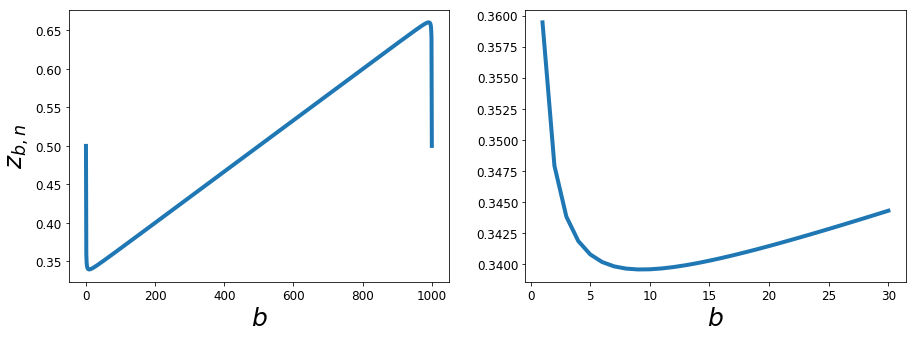

In [8]:
n = 1000
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.ylabel(r'$z_{b, n}$')
plt.xlabel(r'$b$')
plt.plot([z_bn(b, n) for b in range(n + 1)], linewidth=4)
plt.subplot(122)
plt.xlabel(r'$b$')
plt.plot(range(1, int(np.sqrt(n))), 
         [z_bn(b, n) for b in range(1, int(np.sqrt(n)))],
         linewidth=4)
plt.savefig('figures/z_bn.pdf')
plt.show()